<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Random_Forest(Assignment2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are given with the Company data .

# Using Random Forest technique , we need to classify the dataset.

In [ ]:
# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [ ]:
# Read the Dataset

In [ ]:
CD = pd.read_csv('Company_Data (1).csv')

In [ ]:
CD

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
# Basic information of the Dataset

In [ ]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# Checking for null values

In [ ]:
CD.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

No null values in the dataset..Proceeding further.

In [ ]:
# Correlation of the values in the dataset

In [ ]:
CD.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [ ]:
CD.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

 Label Encoding for categorical data items.
 
 We can see that ShelveLoc , Urban , US are categorical datas.
 
 So,we need to apply the LabelEncoder to those columns.

In [ ]:
# Applying LabelEncoder Function

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [ ]:
CD['ShelveLoc1'] = label_encoder.fit_transform(CD['ShelveLoc'])
CD['Urban1'] = label_encoder.fit_transform(CD['Urban'])
CD['US1'] = label_encoder.fit_transform(CD['US'])

In [ ]:
CD

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc1,Urban1,US1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1,1,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,2,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2,1,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,1


In [ ]:
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc1,Urban1,US1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1,0


In [ ]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  ShelveLoc1   400 non-null    int64  
 12  Urban1       400 non-null    int64  
 13  US1          400 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 43.9+ KB


In [ ]:
# Visualization of the dataset

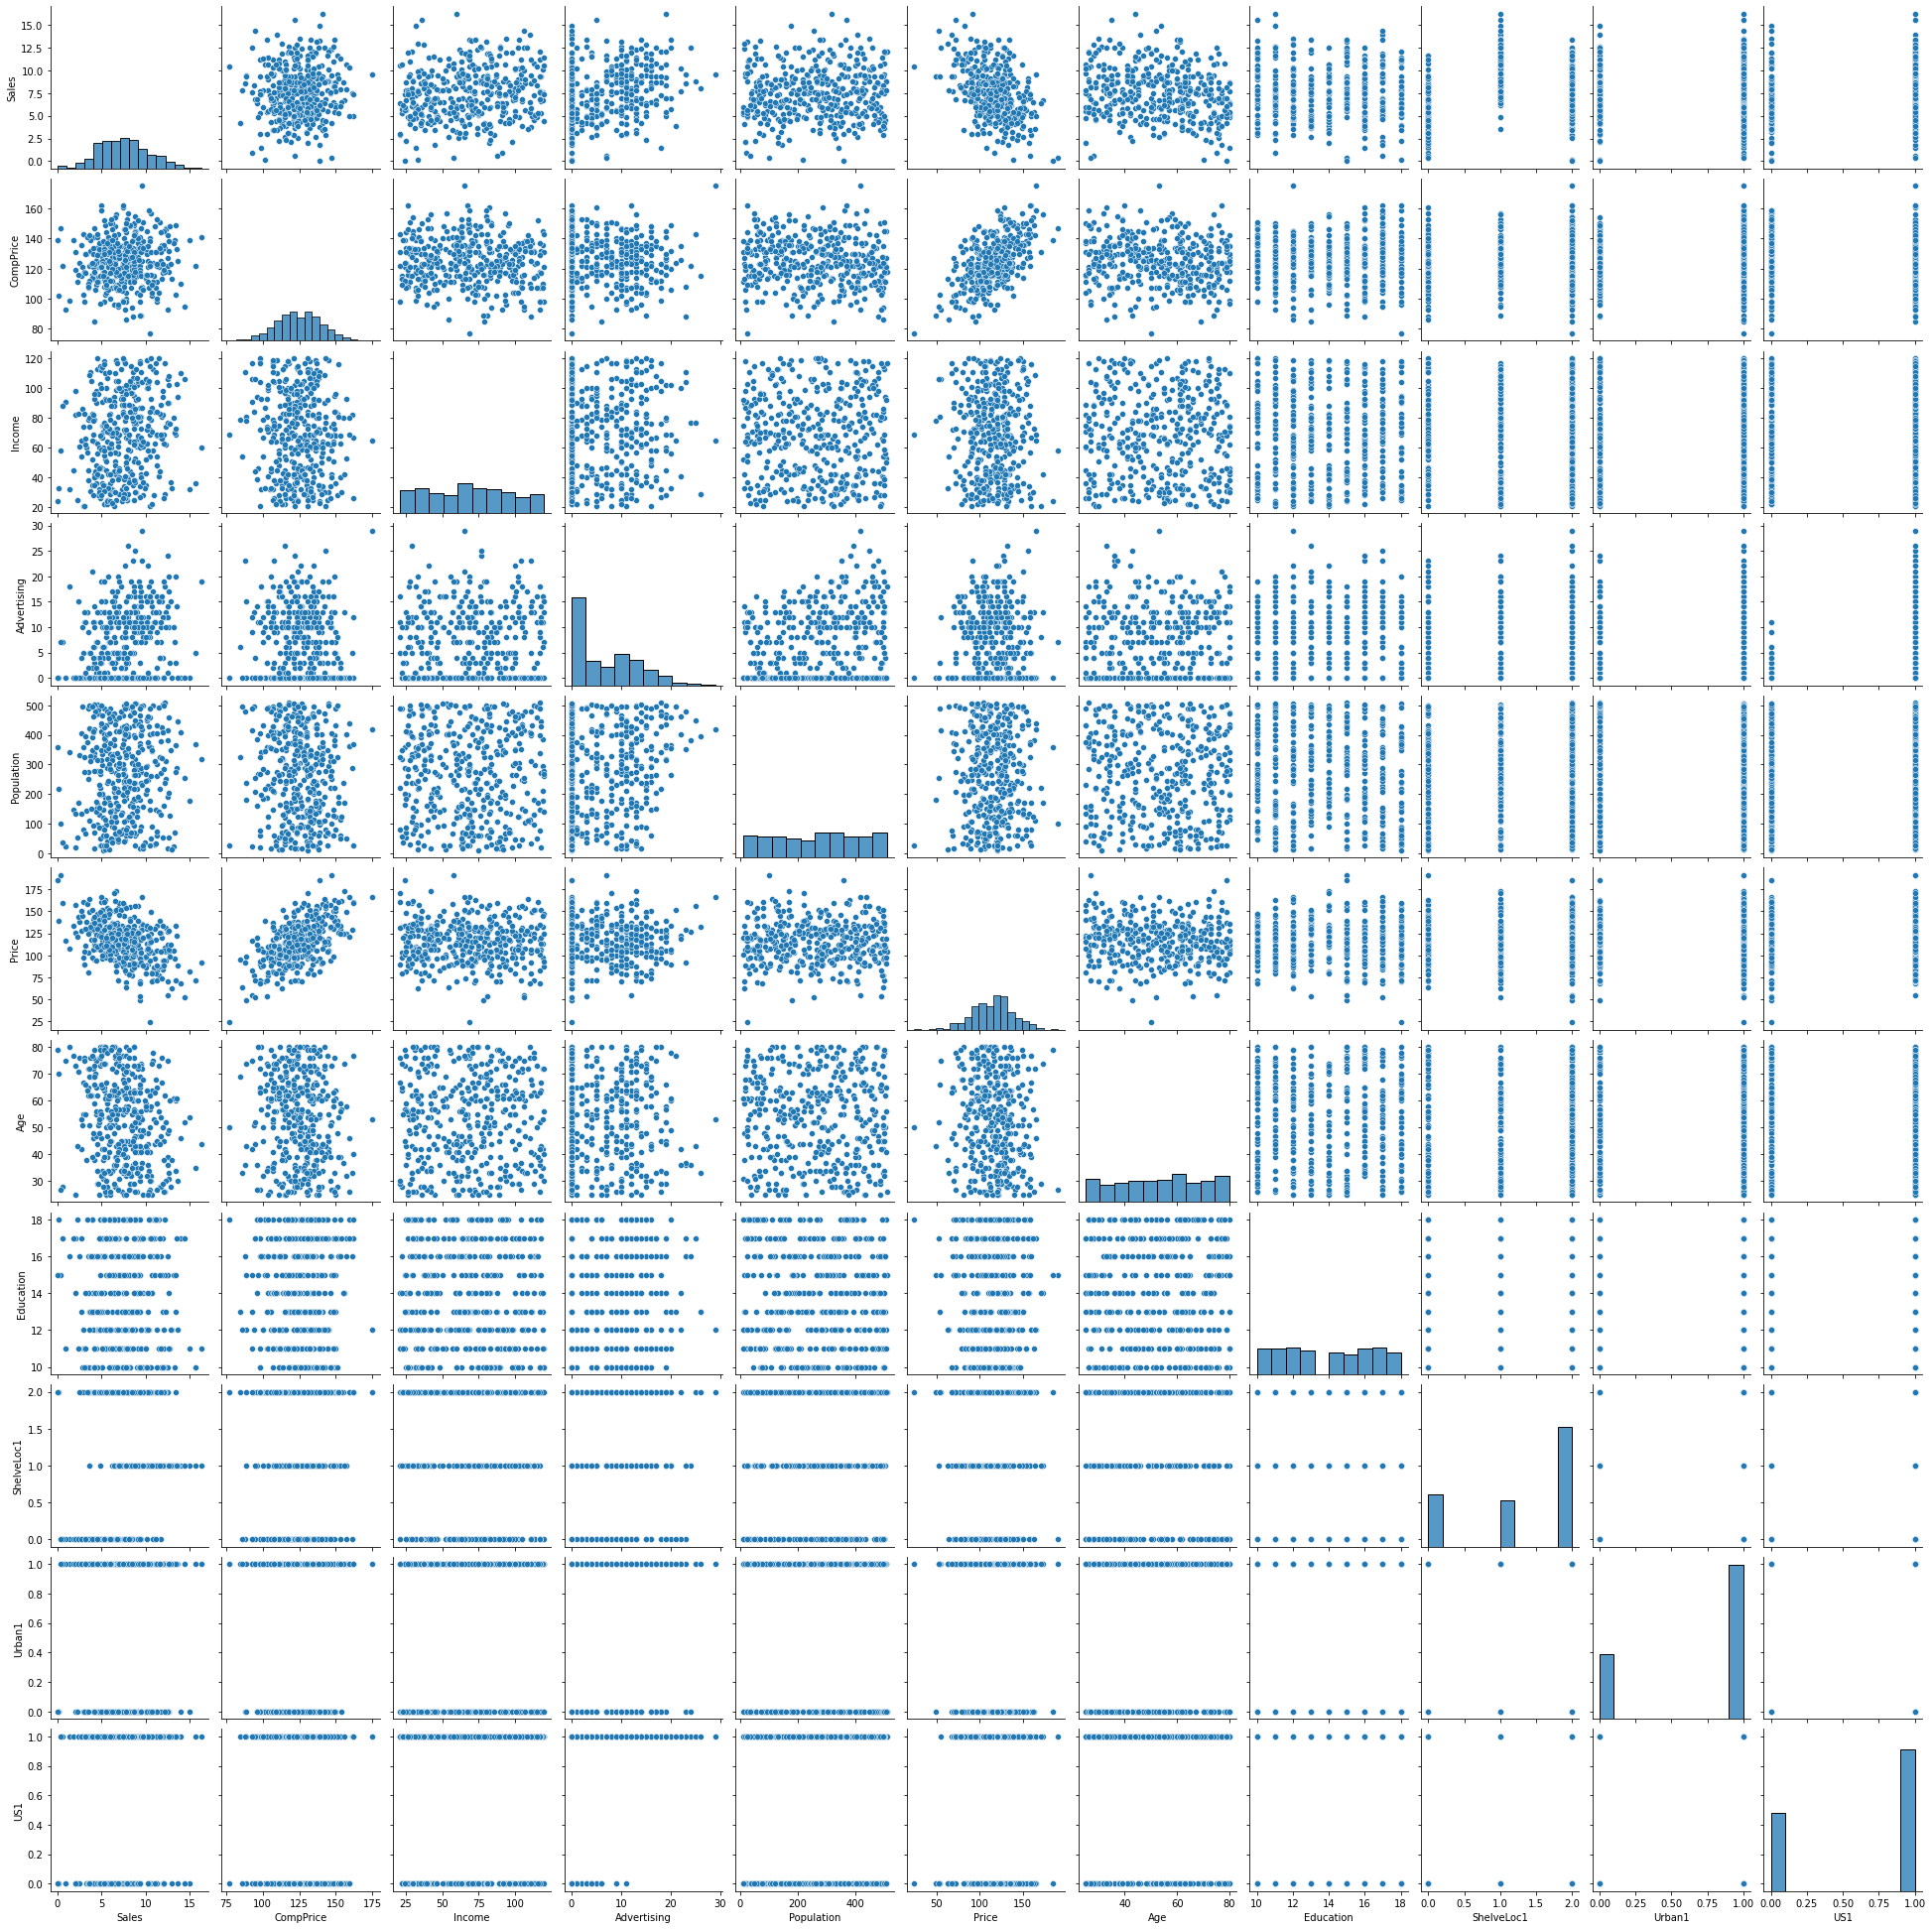

In [ ]:
import seaborn as sns
sns.pairplot(CD)

<AxesSubplot:xlabel='Sales', ylabel='Income'>

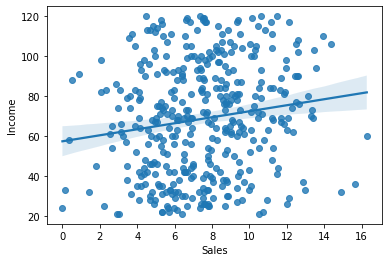

In [ ]:
sns.regplot('Sales','Income', data=CD)  

In [ ]:
CD.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc1,Urban1,US1
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.157470,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.023350,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.067678,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.008544,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.044772,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.014633,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.056488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.001492,-0.033094,-0.078250
ShelveLoc1,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,0.056488,0.001492,1.000000,-0.063978,-0.039760
Urban1,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.063978,1.000000,0.047085


<AxesSubplot:>

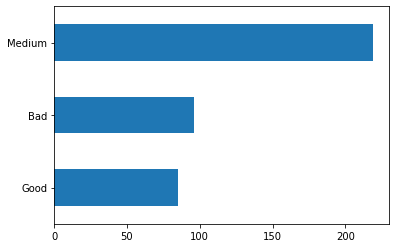

In [ ]:
CD.ShelveLoc.value_counts(ascending=True).plot(kind='barh')

In [ ]:
x=CD.drop(['Sales'], axis=1)
y=CD[['Sales']]
x.head()
x =x.iloc[:,[0,1,2,3,4,6,7,10,11,12]]

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc1,Urban1,US1
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [ ]:
y.tail()

,Sales
395,12.57
396,6.14
397,7.41
398,5.94
399,9.71


**Random Forest Regressor**

In [ ]:
num_trees = 70
max_features = 5

In [ ]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [ ]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6734942254052373


Conclusion:

The estimator comes out to be 0.673 , which seems to be a good estimate value.
